# LAB 1b - ANNDA

In [1]:
import lab1b_mlp
import lab1b_torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import torch
from torch import nn
from tqdm import trange

# Part 1

## Fitting gaussian clusters

### Define architecture and learning params

In [2]:
# Define Network Architecture
arch = [
    2, # Input dimensionality
    7, # Nodes per hidden layer
    1  # Output dimensionality
]
momentum = True
alpha = 0.9
lr = 0.005
n_epochs = 400

In [3]:

# Create Neural Network object
ann = lab1b_mlp.NeuralNetwork(arch, lab1b_mlp.activation_fn, lab1b_mlp.activation_fn_der, momentum, alpha, lr, n_epochs)

### Define patterns and labels

In [4]:
# Define number of samples
N = 100

In [5]:
mean_A1, mean_A2, cov_A = (-1,0.3), (1,0.3), [[0.2**2, 0], [0, 0.2**2]]
mean_B, cov_B = (0,-0.1), [[0.3**2, 0], [0, 0.3**2]]
X_A, X_B = lab1b_mlp.gen_data_clusters(N,mean_A1,mean_A2,cov_A,mean_B,cov_B)


### Random 25% from each class

In [6]:
# Subsample and mix the data
f_A, f_B = 0.75, 0.75
T_train, X_train, T_valid, X_valid = lab1b_mlp.subsample_mix_classes(X_A,X_B,f_A,f_B)

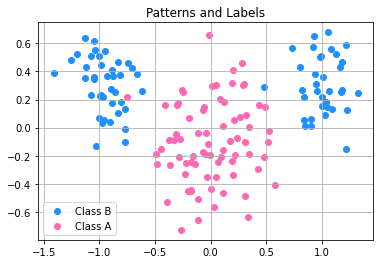

In [7]:
# Plot the patterns and labels
lab1b_mlp.plot_data(X_train,T_train)

In [8]:
# Initialize weights matrices
ann.initialize_weights()

In [9]:
# Load training data
ann.training_data(X_train,T_train)

In [10]:
T_guessed, accuracy_pos, accuracy_neg, accuracy = ann.classify(X_train,T_train,True)

Class A. Hits = 75, Fails = 0, Accuracy = 100.0%
Class B. Hits = 0, Fails = 75, Accuracy = 0.0%
Hits = 75, Fails = 75, Accuracy = 50.0%


In [11]:
epoch_errors, epoch_mses, epoch_errors_valid, epoch_mses_valid = ann.train(X_train,T_train,X_valid,T_valid)

KeyboardInterrupt: 

In [ ]:
T_guessed, accuracy_pos, accuracy_neg, accuracy = ann.classify(X_train,T_train,True)

Class A. Hits = 73, Fails = 2, Accuracy = 97.333%
Class B. Hits = 74, Fails = 1, Accuracy = 98.667%
Hits = 147, Fails = 3, Accuracy = 98.0%


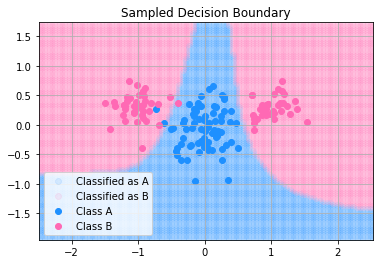

In [ ]:
# Plot the sampled decision boundary
K = 100
L = 1
sampling_pattern, boundary_samples = ann.decision_boundary(X_train,K,L)
lab1b_mlp.plot_data_boundary(X_train,T_train,sampling_pattern,boundary_samples,L)

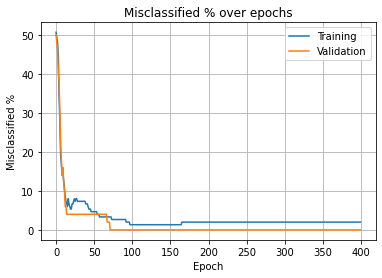

In [ ]:
# Plot missclassification
lab1b_mlp.plot_error(epoch_errors,epoch_errors_valid,'Misclassified %')

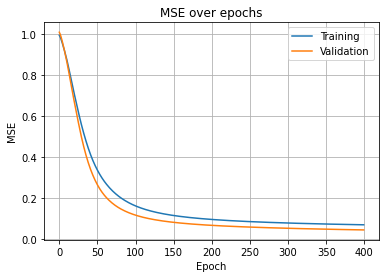

In [ ]:
# Plot MSE
lab1b_mlp.plot_error(epoch_mses,epoch_mses_valid,'MSE')

### 20% from negative x subset of A and 80% positive x subset of A

In [ ]:
# Subsample and mix the data
f_A, f_B, f_posneg = 1, 1, 0.2
T_train, X_train, T_valid, X_valid = lab1b_mlp.subsample_mix_classes_complex(X_A,X_B,f_A,f_B,f_posneg)

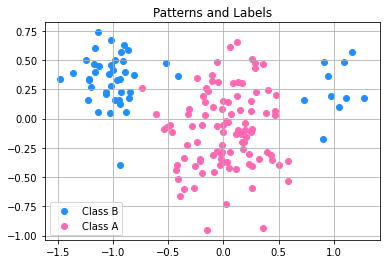

In [ ]:
# Plot the patterns and labels
lab1b_mlp.plot_data(X_train,T_train)

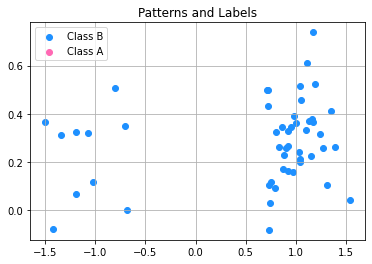

In [ ]:
# Plot the patterns and labels
lab1b_mlp.plot_data(X_valid,T_valid)

In [ ]:
# Initialize weights matrices
ann.initialize_weights()

In [ ]:
# Load training data
ann.training_data(X_train,T_train)

In [ ]:
T_guessed,accuracy_pos, accuracy_neg, accuracy = ann.classify(X_train,T_train,True)

Class A. Hits = 0, Fails = 100, Accuracy = 0.0%
Class B. Hits = 50, Fails = 0, Accuracy = 100.0%
Hits = 50, Fails = 100, Accuracy = 33.333%


In [ ]:
epoch_errors, epoch_mses, epoch_errors_valid, epoch_mses_valid = ann.train(X_train,T_train,X_valid,T_valid)

KeyboardInterrupt: 

In [ ]:
T_guessed, accuracy_pos, accuracy_neg, accuracy = ann.classify(X_train,T_train,True)

Class A. Hits = 99, Fails = 1, Accuracy = 99.0%
Class B. Hits = 38, Fails = 12, Accuracy = 76.0%
Hits = 137, Fails = 13, Accuracy = 91.333%


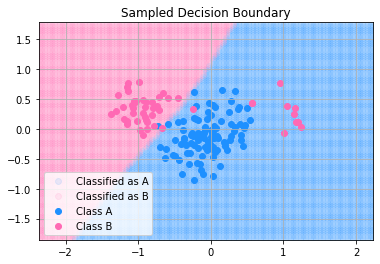

In [ ]:
# Plot the sampled decision boundary
K = 100
L = 1
sampling_pattern, boundary_samples = ann.decision_boundary(X_train,K,L)
lab1b_mlp.plot_data_boundary(X_train,T_train,sampling_pattern,boundary_samples,L)


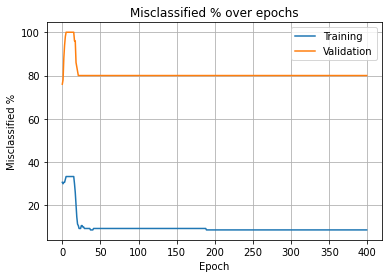

In [ ]:
# Plot missclassification
lab1b_mlp.plot_error(epoch_errors,epoch_errors_valid,'Misclassified %')


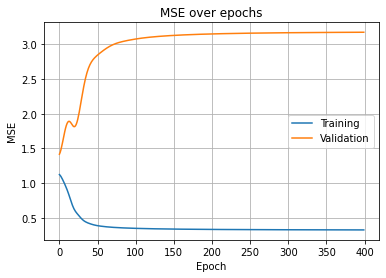

In [ ]:
# Plot MSE
lab1b_mlp.plot_error(epoch_mses,epoch_mses_valid,'MSE')

## Encoder problem

### Define architecture and learning params

In [ ]:
# Define Network Architecture
arch = [
    8, # Input dimensionality
    2, # Nodes per hidden layer
    8  # Output dimensionality
]
momentum = True
alpha = 0.9
lr = 0.1
n_epochs = 5000

In [ ]:

# Create Neural Network object
ann = lab1b_mlp.NeuralNetwork(arch, lab1b_mlp.activation_fn, lab1b_mlp.activation_fn_der, momentum, alpha, lr, n_epochs)

### Generate data

In [ ]:
X_train = np.eye(8)*2 - 1
T_train = X_train
X_valid = X_train
T_valid = T_train

### Train network

In [ ]:
# Initialize weights matrices
ann.initialize_weights()


In [ ]:
# Load training data
ann.training_data(X_train,T_train)


In [ ]:
T_guessed, accuracy = ann.classify_matrix(X_train,T_train,True)


Hits = 0, Fails = 8, Accuracy = 0.0%


In [ ]:

epoch_errors, epoch_mses, epoch_errors_valid, epoch_mses_valid = ann.train(X_train,T_train,X_valid,T_valid,matrix=True)

In [ ]:
T_guessed, accuracy = ann.classify_matrix(X_train,T_train,True)

Hits = 7, Fails = 1, Accuracy = 87.5%


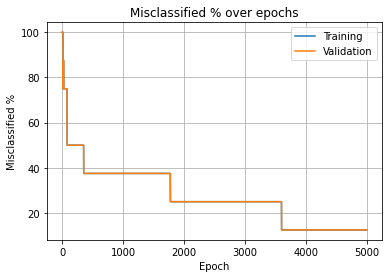

In [ ]:
# Plot missclassification
lab1b_mlp.plot_error(epoch_errors,epoch_errors_valid,'Misclassified %')

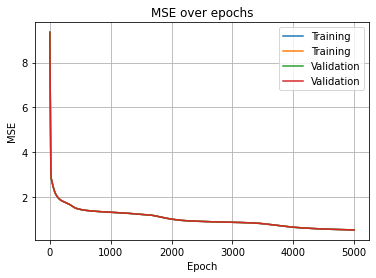

In [ ]:
# Plot MSE
lab1b_mlp.plot_error(epoch_mses,epoch_mses_valid,'MSE')

In [ ]:
# Vectorize activation function
i = 1
X_i = np.array([X_train[:,i]]).T
O_i = ann.forward_pass(X_i)
vfunc = np.vectorize(lab1b_mlp.activation_fn)
vfunc(ann.forward_mem[0])

array([[-0.59576422],
       [ 0.91835815]])

## Function approximation


### Define architecture and learning params


In [12]:
# Define Network Architecture
arch = [
    2, # Input dimensionality
    12, # Nodes per hidden layer
    1  # Output dimensionality
]
momentum = True
alpha = 0.9
lr = 0.05
n_epochs = 200


In [13]:
# Create Neural Network object
ann = lab1b_mlp.NeuralNetwork(arch, lab1b_mlp.activation_fn, lab1b_mlp.activation_fn_der, momentum, alpha, lr, n_epochs)

### Generate data

In [14]:
N = 500
feat_range = [-5,5]
variance = 10 
bias = -0.5
noise_variance = 0.00 #0.05
X,T,X_grid,Y_grid,Z_grid = lab1b_mlp.generate_func_approx_data(N,feat_range,variance,bias,noise_variance=noise_variance)

Text(0.5, 0.92, '2D function to be approximated')

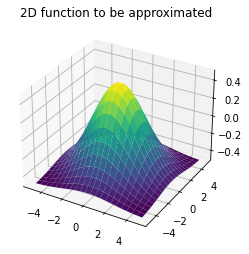

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X_grid, Y_grid, Z_grid, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('2D function to be approximated')

In [16]:
variance_repetitions = 10
epoch_errors_mat = np.zeros([7,variance_repetitions])
epoch_mses_mat = np.zeros([7,variance_repetitions])
epoch_errors_valid_mat = np.zeros([7,variance_repetitions])
epoch_mses_valid_mat = np.zeros([7,variance_repetitions])
for ff in range(1,26,4):
    arch = [
    2, # Input dimensionality
    ff+1, # Nodes per hidden layer
    1  # Output dimensionality
    ]   
    # Create Neural Network object
    ann = lab1b_mlp.NeuralNetwork(arch, lab1b_mlp.activation_fn, lab1b_mlp.activation_fn_der, momentum, alpha, lr, n_epochs)
    ann.training_data(X_train,T_train) #Load training data

    for fff in range(variance_repetitions):
        # Initialize weights matrices
        ann.initialize_weights()
        epoch_errors_mat[ff,fff], epoch_mses_mat[ff,fff], epoch_errors_valid_mat[ff,fff], epoch_mses_valid_mat[ff,fff] = ann.train(X_train,T_train,X_valid,T_valid,matrix=False) #Train

x = np.linspace(1,25,25)
train_mean = np.mean(epoch_mses_mat[-1])
train_var = np.var(epoch_mses_mat[-1])
plt.plot(x, train_mean, 'k-')
plt.fill_between(x, train_mean-train_var, train_mean+train_var)

val_mean = np.mean(epoch_mses_valid_mat[-1])
val_var = np.var(epoch_mses_valid_mat[-1])
plt.plot(x, train_mean, 'k-')
plt.fill_between(x, train_mean-train_var, train_mean+train_var)

plt.show()


In [ ]:
# Subsample function data
f = 0.75
X_train, T_train, X_valid, T_valid = lab1b_mlp.subsample_function_data(X,T,f)

### Train network

In [ ]:
# Initialize weights matrices
ann.initialize_weights()

In [ ]:

# Load training data
ann.training_data(X_train,T_train)

In [ ]:
epoch_errors, epoch_mses, epoch_errors_valid, epoch_mses_valid = ann.train(X_train,T_train,X_valid,T_valid,matrix=False)

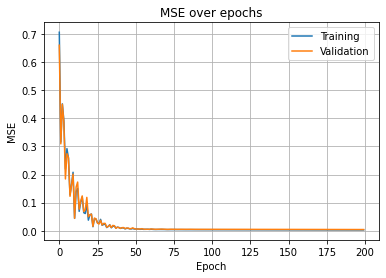

In [ ]:
# Plot MSE
lab1b_mlp.plot_error(epoch_mses,epoch_mses_valid,'MSE')

In [ ]:
# Generate data for plot
Z_grid_guessed = np.reshape(ann.forward_pass(X),(int(np.sqrt(N)),int(np.sqrt(N))))
Z_grid_error = Z_grid_guessed - Z_grid

Text(0.5, 0.92, '2D function approx.')

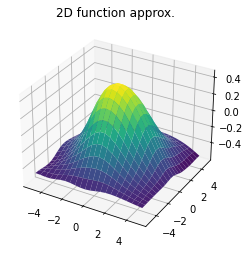

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X_grid, Y_grid, Z_grid_guessed, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('2D function approx.')

Text(0.5, 0.92, '2D approx. error')

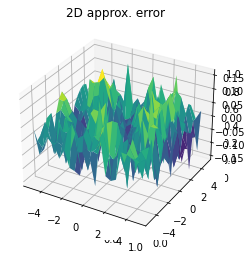

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X_grid, Y_grid, Z_grid_error, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('2D approx. error')

In [ ]:
mse_overall = (f*epoch_mses[-1] +  (1-f)*epoch_mses_valid[-1])[0]

# Part 2

In [ ]:
# Generate data according to Mackey Glass time series
beta = 0.2
tau = 25
gamma = 0.1
n = 10
N = 2000
x,X,T = lab1b_torch.gen_mackey_glass_series(beta,tau,gamma,n,N)

In [ ]:
# Obtain a subdivision of generated data
X_samples = X[:,301:1501]
T_samples = T[:,301:1501]

In [ ]:
#Split data
X_train = X_samples[:,:600]
X_valid = X_samples[:,600:1000]
X_test = X_samples[:,1000:]
T_train = T_samples[:,:600]
T_valid = T_samples[:,600:1000]
T_test = T_samples[:,1000:]

# Convert data to tensors
X_train_ten = torch.tensor(X_train.T,dtype=torch.float)
T_train_ten = torch.tensor(T_train.T,dtype=torch.float)
X_valid_ten = torch.tensor(X_valid.T,dtype=torch.float)
T_valid_ten = torch.tensor(T_valid.T,dtype=torch.float)
X_test_ten = torch.tensor(X_test.T,dtype=torch.float)
T_test_ten = torch.tensor(T_test.T,dtype=torch.float)

In [ ]:
## Neural Network Dimensions
input_size, output_size = 5, 1

In [ ]:
# Define loss and optimizer
lr = 0.005
n_epochs = 3000
mseloss = nn.MSELoss()

In [ ]:
# Compare models
hidden_sizes_1 = [3,4,5]
hidden_sizes_2 = [2,4,6]
combs, combs_mean_mses, combs_mean_mses_valid = lab1b_torch.compare_archs(lr,n_epochs,mseloss,X_train_ten,T_train_ten,X_valid_ten,T_valid_ten,input_size,output_size,hidden_sizes_1,hidden_sizes_2)
combs_gen_error = [combs_mean_mses_valid[i]-combs_mean_mses[i] for i in range(9)]

KeyboardInterrupt: 

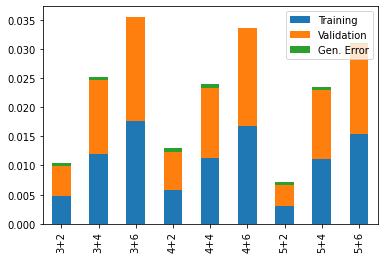

In [ ]:
# Plot models comparison
lab1b_torch.plot_archs_comparison(combs,combs_mean_mses,combs_mean_mses_valid,combs_gen_error)

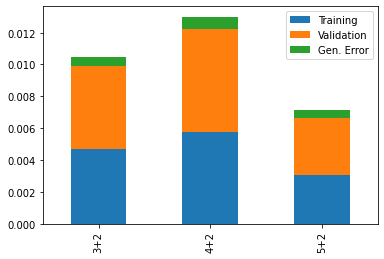

In [ ]:
# Plot models comparison
best_combs = [combs[i] for i in range(0,9,3)]
best_combs_mean_mses = [combs_mean_mses[i] for i in range(0,9,3)]
best_combs_mean_mses_valid = [combs_mean_mses_valid[i] for i in range(0,9,3)]
best_combs_gen_error = [combs_gen_error[i] for i in range(0,9,3)]
lab1b_torch.plot_archs_comparison(best_combs,best_combs_mean_mses,best_combs_mean_mses_valid,best_combs_gen_error)

## BEST MODEL

In [ ]:
# Train model
hidden_size_1 = hidden_sizes_1[2]
hidden_size_2 = hidden_sizes_2[0]
model = lab1b_torch.NeuralNetwork(input_size, hidden_size_1, hidden_size_2, output_size)
mses, mses_valid, T_pred_train_ten, T_pred_valid_ten = model.train(lr,n_epochs,mseloss,X_train_ten,T_train_ten,X_valid_ten,T_valid_ten)

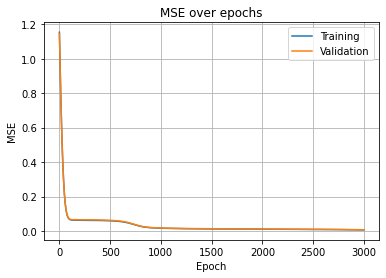

In [ ]:
lab1b_torch.plot_error(mses,mses_valid,'MSE')

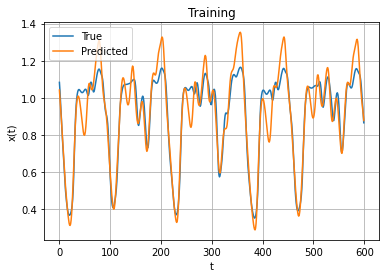

In [ ]:
lab1b_torch.plot_series(T_pred_train_ten.detach().numpy().T.reshape(-1),T_train.reshape(-1),'Training')

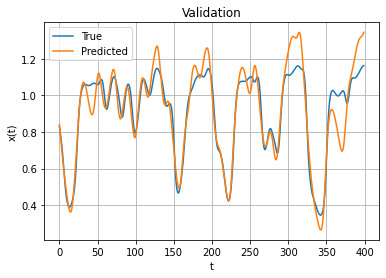

In [ ]:
lab1b_torch.plot_series(T_pred_valid_ten.detach().numpy().T.reshape(-1),T_valid.reshape(-1),'Validation')

## WORST MODEL

In [ ]:
# Train model
hidden_size_1 = hidden_sizes_1[1]
hidden_size_2 = hidden_sizes_2[2]
model = lab1b_torch.NeuralNetwork(input_size, hidden_size_1, hidden_size_2, output_size)
mses, mses_valid, T_pred_train_ten, T_pred_valid_ten = model.train(lr,n_epochs,mseloss,X_train_ten,T_train_ten,X_valid_ten,T_valid_ten)

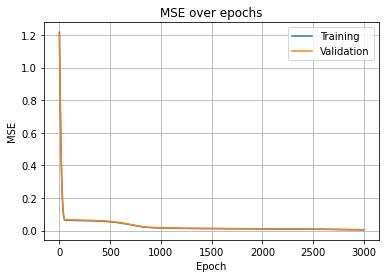

In [ ]:
lab1b_torch.plot_error(mses,mses_valid,'MSE')

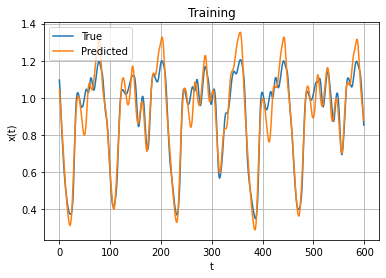

In [ ]:
lab1b_torch.plot_series(T_pred_train_ten.detach().numpy().T.reshape(-1),T_train.reshape(-1),'Training')

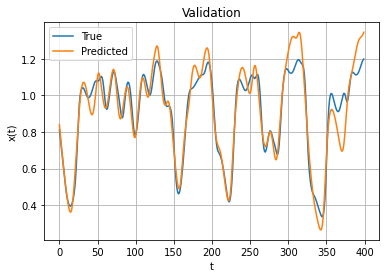

In [ ]:
lab1b_torch.plot_series(T_pred_valid_ten.detach().numpy().T.reshape(-1),T_valid.reshape(-1),'Validation')